In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import time

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Metrics Evaluation
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# MLP Architecture (Multi Layer Perceptron)
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

# CNN Architecture (Convolutional Neural Network)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
brain_signal = pd.read_excel(r'/content/drive/MyDrive/EEG_Dataset_Decoded/Training_data.xlsx',header=None)

In [ ]:
print(brain_signal.shape)
print("Number of rows: "+str(brain_signal.shape[0]))
print("Number of columns: "+str(brain_signal.shape[1]))

(24343, 640)
Number of rows: 24343
Number of columns: 640


In [ ]:
brain_signal_labels = pd.read_excel(r'/content/drive/MyDrive/EEG_Dataset_Decoded/Training_labels.xlsx',header=None)

In [ ]:
print(brain_signal_labels.shape)
print("Number of rows: "+str(brain_signal_labels.shape[0]))
print("Number of columns: "+str(brain_signal_labels.shape[1]))

(24343, 1)
Number of rows: 24343
Number of columns: 1


In [ ]:
brain_signal_labels.value_counts()

3    6088
2    6087
0    6085
1    6083
dtype: int64

In [ ]:
brain_signal.isnull().values.any()

False

In [ ]:
brain_signal_labels.isnull().values.any()

False

In [ ]:
# define min max scaler
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc= MinMaxScaler()
# sc = StandardScaler()
# transform data
scaled_brain_signal= sc.fit_transform(brain_signal)

In [ ]:
#SVD
from sklearn.decomposition import TruncatedSVD # optimized form of SVD
import time

Number of components = 4 and explained variance = 0.15700835763393475
Number of components = 10 and explained variance = 0.42535719243673015
Number of components = 15 and explained variance = 0.5936906618009984
Number of components = 20 and explained variance = 0.7130387254173337
Number of components = 25 and explained variance = 0.8067687523535789
Number of components = 30 and explained variance = 0.8682883489794699
Number of components = 40 and explained variance = 0.9445336003526221
Number of components = 50 and explained variance = 0.9786109370460555
Number of components = 100 and explained variance = 0.9999729556362259
Number of components = 150 and explained variance = 0.9999966265777837
Number of components = 200 and explained variance = 0.9999977435337941
Number of components = 500 and explained variance = 0.9999999970128729


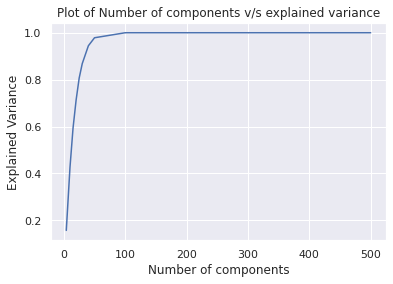

Duration: 32.76143431663513 seconds
CPU times: user 43.2 s, sys: 20.1 s, total: 1min 3s
Wall time: 32.8 s


In [ ]:
# Program to find the optimal number of components for Truncated SVD
%%time
start = time.time()
n_comp = [4,10,15,20,25,30,40,50,100,150,200,500] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(scaled_brain_signal)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()
print('Duration: {} seconds'.format(time.time() - start))

In [ ]:
start = time.time()
svd = TruncatedSVD(n_components=25)
principalComponents= svd.fit_transform(scaled_brain_signal)
print('Duration: {} seconds'.format(time.time() - start))
train_svd = pd.DataFrame(data = principalComponents)

Duration: 1.474442958831787 seconds


In [ ]:
train_svd

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,5.778480,-0.640222,0.179728,-0.410133,0.222423,-0.080063,-0.773071,1.361174,-0.380127,-0.825067,...,-0.469924,-0.275478,-0.969582,0.327231,-0.455442,0.624885,0.152007,-0.381613,0.021202,0.506256
1,5.796927,1.628617,0.017926,-0.304221,1.928838,0.554984,-0.687067,-0.229926,0.633148,0.336554,...,-0.746611,-0.192526,-0.080615,0.084425,-0.112626,-0.130843,0.426510,-0.463336,0.062584,0.555266
2,5.788724,1.488667,0.383284,-0.959041,-0.251521,0.610469,-1.460108,-0.533423,-0.878819,-1.378175,...,0.611979,0.091631,0.379929,-0.125221,-0.312763,0.047948,-0.097537,-0.033039,0.105715,0.145667
3,5.746307,1.038455,-0.604942,0.045660,1.202565,0.716039,-0.847091,-0.791397,0.130906,0.006150,...,-0.177899,0.834191,-0.115964,-0.311698,0.737937,-0.511405,-0.239860,0.223367,0.425744,-0.140696
4,5.771434,-0.356915,-0.201454,-0.771117,-0.320313,-0.518421,0.385899,1.484792,0.314222,-0.545623,...,-0.465336,0.715046,0.233228,-0.577343,-0.747536,0.931599,0.080634,-0.036766,0.710631,-0.630736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24338,5.743664,-0.543931,-0.795314,-0.240648,-0.210668,-0.315483,-0.092828,2.452313,-0.935973,-1.075487,...,0.363379,0.119882,0.429320,-0.173036,-0.143458,-0.014633,-0.194740,-0.148446,0.187445,0.089599
24339,5.870565,0.355230,-1.443942,-0.760943,-0.451325,-0.289604,0.701614,-1.240064,-0.973213,0.332337,...,0.180589,0.762808,-0.384643,-0.156836,-0.104738,-0.067746,-0.165639,0.585322,0.218056,0.228887
24340,5.747010,-0.309058,-0.546653,0.105063,-0.530356,0.005005,0.530194,0.760143,-0.011936,-0.484630,...,1.198902,-0.328101,-0.151964,-0.706580,-0.653715,0.141495,-0.467821,0.163092,-0.427627,-0.359734
24341,5.807024,-0.453047,0.246566,-0.488551,-0.379318,0.463300,0.246175,1.247626,0.050039,1.623705,...,-0.614799,0.166603,-0.010779,0.028307,-0.106925,-0.054702,-1.263792,-0.245657,0.647970,-0.081264


In [ ]:
labels_out = brain_signal_labels[0].ravel()

In [ ]:
labels_out

array([2, 1, 2, ..., 0, 2, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(train_svd, labels_out, test_size = 0.20, random_state = 100)

In [ ]:
# Run it
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbm = GradientBoostingClassifier(max_depth=20)
classifier_gbm.fit(X_Train,Y_Train)

GradientBoostingClassifier(max_depth=20)

In [ ]:
Y_Pred_gbm = classifier_gbm.predict(X_Test) # Run 

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, y_pred_gbm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_GBM')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, Y_pred_gbm))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(max_depth=300, random_state=150)


# fit the model
clf_en.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=300, random_state=150)

In [ ]:
y_pred_en = clf_en.predict(X_Test)

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, y_pred_en)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_DT')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, y_pred_en))

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [ ]:
model_gauss= GaussianNB()

In [ ]:
model_gauss.fit(X_Train,Y_Train)

GaussianNB()

In [ ]:
Y_Pred_gaussnb= model_gauss.predict(X_Test)

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, Y_Pred_gaussnb)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_gaussnb')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, Y_Pred_gaussnb))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier(n_estimators=100)
classifier_ada.fit(X_Train,Y_Train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
Y_Pred_ada = classifier_ada.predict(X_Test)

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, Y_Pred_ada)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_ADA')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, Y_Pred_ada))

In [ ]:
# Run it
rom sklearn.ensemble import GradientBoostingClassifier
classifier_gbm = GradientBoostingClassifier(max_depth=20)
classifier_gbm.fit(X_Train,Y_Train)

GradientBoostingClassifier(max_depth=20)

In [ ]:
Y_Pred_gbm = classifier_gbm.predict(X_Test) # Run 

              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1204
           1       0.63      0.71      0.67      1231
           2       0.73      0.66      0.69      1226
           3       0.73      0.61      0.66      1208

    accuracy                           0.67      4869
   macro avg       0.68      0.67      0.67      4869
weighted avg       0.68      0.67      0.67      4869



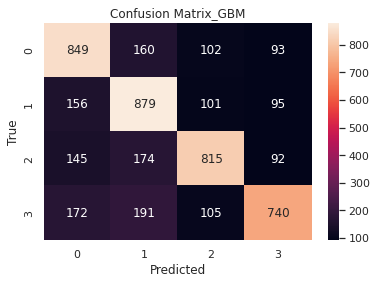

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, Y_Pred_gbm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_GBM')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, Y_Pred_gbm))#Run

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
classifier_hgbm = HistGradientBoostingClassifier(max_depth=20)
classifier_hgbm.fit(X_Train,Y_Train)

HistGradientBoostingClassifier(max_depth=20)

In [ ]:
Y_Pred_hgbm = classifier_hgbm.predict(X_Test)

              precision    recall  f1-score   support

           0       0.49      0.50      0.49      1204
           1       0.49      0.49      0.49      1231
           2       0.49      0.48      0.48      1226
           3       0.48      0.50      0.49      1208

    accuracy                           0.49      4869
   macro avg       0.49      0.49      0.49      4869
weighted avg       0.49      0.49      0.49      4869



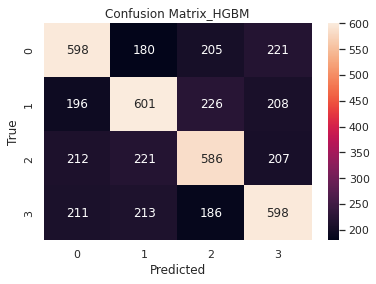

In [ ]:
import seaborn as sns
from sklearn import metrics 
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(Y_Test, Y_Pred_hgbm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix_HGBM')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(Y_Test, Y_Pred_hgbm))

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
classifier_mlp = MLPClassifier(random_state=1, max_iter=300)
classifier_mlp.fit(X_Train,Y_Train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [ ]:
Y_Pred_mlp = classifier_mlp.predict(X_Test)

In [ ]:
X_conv = principalComponents.reshape(principalComponents.shape[0], principalComponents.shape[1], 1)
print(X_conv.shape)

(24343, 20, 1)


In [ ]:
xtrain, xtest, ytrain, ytest=train_test_split(X_conv, labels_out, test_size=0.25,random_state=120)

In [ ]:
#1-d CNN Architecture
model = Sequential()
model.add(Conv1D(filters = 1024, kernel_size = 3, activation="relu", input_shape=(25,1)))
# model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
# model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam",metrics = ['accuracy'])
model.fit(xtrain, ytrain, batch_size=5,epochs=50, verbose=1)